In [1]:
import polars as pl
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

a = 20

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('close') / pl.col('close').shift(1) - 1).alias('return'),
    pl.col('volume').rolling_mean(a).over('symbol').alias('adv')
])

df = df.with_columns([
    (-1 * pl.col('return') * pl.col('adv') * pl.col('vwap') * (pl.col('high') - pl.col('close'))).alias('alpha25')
])



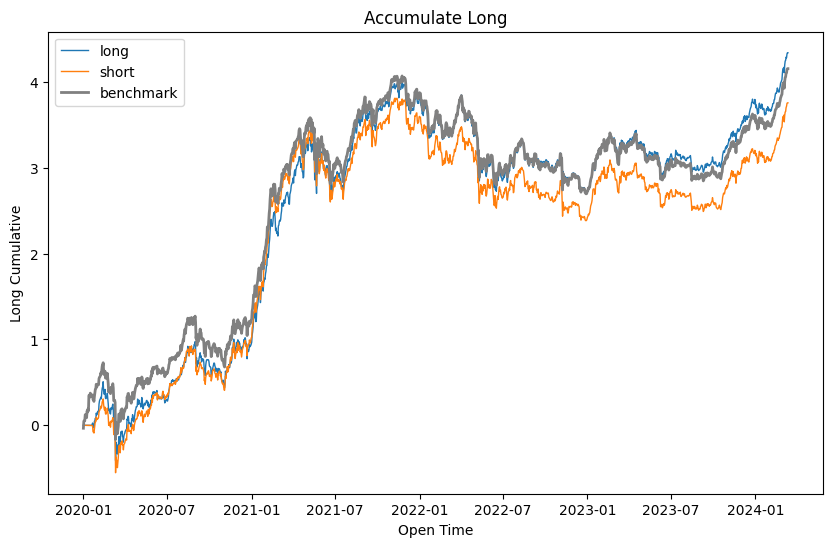

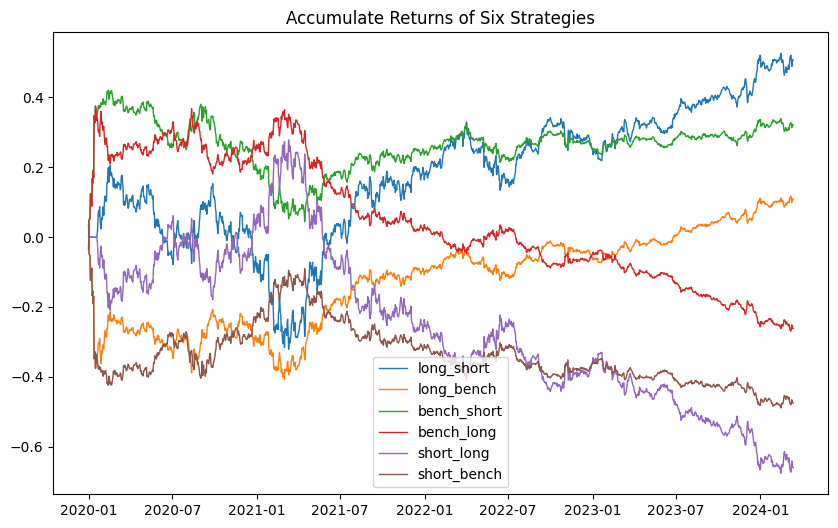

long: 
ann_return = 24.8047  sharpe = 5.4241  maxdd = 0.6094  calmar_ratio = 40.7042  

short: 
ann_return = 21.4692  sharpe = 4.762  maxdd = 0.6576  calmar_ratio = 32.6464  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 2.8975  sharpe = 2.3432  maxdd = 0.4366  calmar_ratio = 6.637  

long_bench: 
ann_return = 0.6219  sharpe = 0.7117  maxdd = 0.4264  calmar_ratio = 1.4584  

bench_long: 
ann_return = -1.4979  sharpe = -1.7142  maxdd = 0.4686  calmar_ratio = -3.1965  

short_long: 
ann_return = -3.7735  sharpe = -3.0516  maxdd = 0.7466  calmar_ratio = -5.0541  

short_bench: 
ann_return = -2.7137  sharpe = -3.0831  maxdd = 0.5061  calmar_ratio = -5.3618  

bench_short: 
ann_return = 1.8377  sharpe = 2.0878  maxdd = 0.2649  calmar_ratio = 6.9373  



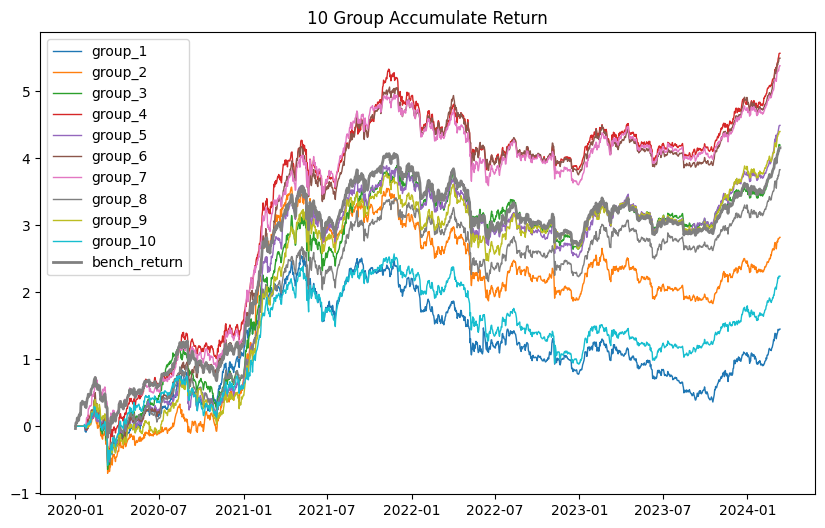

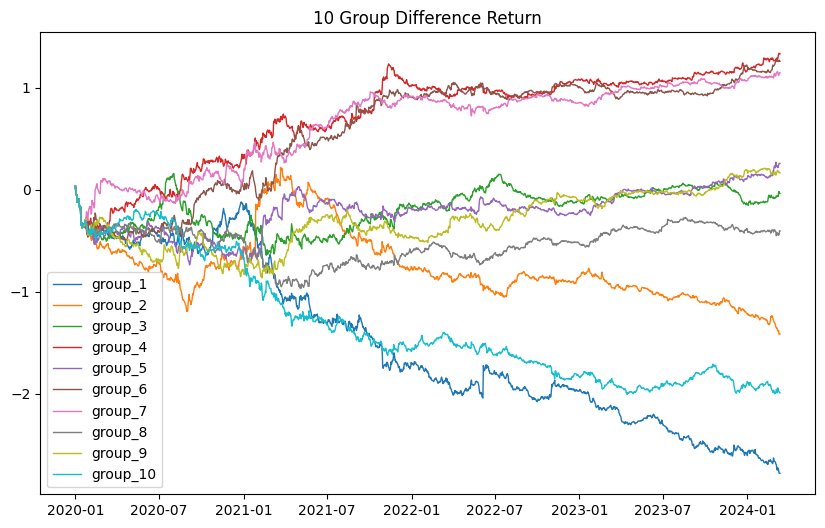

group_1: 
ann_return = 8.2836  sharpe = 1.8108  maxdd = 0.6812  calmar_ratio = 12.1595  

group_2: 
ann_return = 16.1018  sharpe = 3.2857  maxdd = 0.7526  calmar_ratio = 21.3958  

group_3: 
ann_return = 23.9654  sharpe = 5.0294  maxdd = 0.7434  calmar_ratio = 32.2367  

group_4: 
ann_return = 31.7959  sharpe = 6.6027  maxdd = 0.6298  calmar_ratio = 50.4876  

group_5: 
ann_return = 25.6487  sharpe = 5.3313  maxdd = 0.6076  calmar_ratio = 42.2143  

group_6: 
ann_return = 31.3769  sharpe = 6.4518  maxdd = 0.6987  calmar_ratio = 44.9089  

group_7: 
ann_return = 30.7356  sharpe = 6.3126  maxdd = 0.4831  calmar_ratio = 63.6172  

group_8: 
ann_return = 21.8745  sharpe = 4.6411  maxdd = 0.6354  calmar_ratio = 34.4271  

group_9: 
ann_return = 25.1258  sharpe = 5.2428  maxdd = 0.6642  calmar_ratio = 37.8284  

group_10: 
ann_return = 12.7919  sharpe = 2.835  maxdd = 0.676  calmar_ratio = 18.9224  

-----------------------------------------
group_difference_1: 
ann_return = -15.8992  sharpe

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha25'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()